# Financial Distress Prediction

![banner-image](https://i.imgur.com/Y6WWKQk.jpg)

## Introduction

Banks play a crucial role in market economies. They decide who can get finance and on what terms and what can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Lenders approve loans based on several factors, including your credit score. 

**what are credit scores?**

Traditional credit scores try to predict how likely you are to repay a loan, and they use historical data about your borrowing behavior to do so. To generate a credit score, a computer program reads through data in your credit reports looking for information like:

* Whether you have borrowed money in the past, and how long you’ve been borrowing
* Whether you repaid your loans as agreed
* Whether you’ve missed payments on your loans in the past
* How you’re currently using debt, including how much you’re borrowing, and what types of debt you use
* Whether any public records about you exist, like bankruptcy or legal judgments against you from a creditor
* Whether you’ve recently applied for loans

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. 

### Project Objective

The aim of this project is to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years. This model will help borrowers to make the best financial decisions. To accomplish this task, we will be using a dataset that contains about 150,000 rows with 12 columns. The target column of our dataset has two variables, 0 and 1;
- 0 represents - No, the borrower will not experience financial distress in the next two years, and
- 1 represents - Yes, the borrower will experience financial distress in the next two years

**Source**: The dataset used for this project was obtained from Kaggle: [Link](https://www.kaggle.com/competitions/GiveMeSomeCredit/overview)

### Project Outline

Here's the outline we will follow to complete this project

* Downloading the Data
* Perform exploratory analysis and visualization on the dataset
* Preprocess and clean the data using the pandas library
* Set up evaluation metrics
* uild models
* Tune hyperparameters of our best performing model
* Make predictions on new input data

Before we begin let's do a variale name description to better understand the dataset we will be working with.

* `SeriousDlqin2yrs`: Person experienced 90 days past due delinquency or worse Y/N
* `RevolvingUtilizationOfUnsecuredLines`: Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits percentage
* `age`: Age of borrower in years integer
* `NumberOfTime3059DaysPastDueNotWorse`: Number of times borrower has been 30-59 days past due but no worse in the last 2 years. integer
* `DebtRatio`: Monthly debt payments, alimony,living costs divided by monthy gross income percentage
* `MonthlyIncome`: Monthly income real
* `NumberOfOpenCreditLinesAndLoans`: Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards) integer
* `NumberOfTimes90DaysLate`: Number of times borrower has been 90 days or more past due. integer
* `NumberRealEstateLoansOrLines`: Number of mortgage and real estate loans including home equity lines of credit integer
* `NumberOfTime60-89DaysPastDueNotWorse`: Number of times borrower has been 60-89 days past due but no worse in the last 2 years. integer
* `NumberOfDependents`: Number of dependents in family excluding themselves (spouse, children etc.) integer





### Importing Libraries

To begin, let's install and import useful libraries.

In [1]:
!pip install missingno plotly opendatasets scikit-learn xgboost lightgbm --upgrade --quiet

     |████████████████████████████████| 15.3 MB 5.1 MB/s 
     |████████████████████████████████| 255.9 MB 35 kB/s 
     |████████████████████████████████| 2.0 MB 39.6 MB/s 


In [2]:
# Importing libraries

import opendatasets as od
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import matplotlib
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

## Downloading the Data

We will use the opendatasets library, which is a Python library for downloading datasets from Kaggle, Google Drive, and other online sources, to download the data from kaggle.

In [3]:
od.download('https://www.kaggle.com/competitions/GiveMeSomeCredit/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: chiamakaanuebunwa
Your Kaggle Key: ··········


100%|██████████| 5.16M/5.16M [00:00<00:00, 130MB/s]


Extracting archive ./GiveMeSomeCredit/GiveMeSomeCredit.zip to ./GiveMeSomeCredit


Let's browse the directory to check the downloaded files

In [4]:
os.listdir('GiveMeSomeCredit')

['cs-training.csv', 'sampleEntry.csv', 'Data Dictionary.xls', 'cs-test.csv']

Converting the files to dataframe

In [5]:
df = pd.read_csv('GiveMeSomeCredit/cs-training.csv')
test_df = pd.read_csv('GiveMeSomeCredit/cs-test.csv')
submission = pd.read_csv('GiveMeSomeCredit/sampleEntry.csv')

In [6]:
df

Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
0                1                 1                              0.766127   
1                2                 0                              0.957151   
2                3                 0                              0.658180   
3                4                 0                              0.233810   
4                5                 0                              0.907239   
...            ...               ...                                   ...   
149995      149996                 0                              0.040674   
149996      149997                 0                              0.299745   
149997      149998                 0                              0.246044   
149998      149999                 0                              0.000000   
149999      150000                 0                              0.850283   

        age  NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  MonthlyIncome  \
0        45                                     2     0.802982         9120.0   
1        40                                     0     0.121876         2600.0   
2        38                                     1     0.085113         3042.0   
3        30                                     0     0.036050         3300.0   
4        49                                     1     0.024926        63588.0   
...     ...                                   ...          ...            ...   
149995   74                                     0     0.225131         2100.0   
149996   44                                     0     0.716562         5584.0   
149997   58                                     0  3870.000000            NaN   
149998   30                                     0     0.000000         5716.0   
149999   64                                     0     0.249908         8158.0   

        NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                                    13                        0   
1                                     4                        0   
2                                     2                        1   
3                                     5                        0   
4                                     7                        0   
...                                 ...                      ...   
149995                                4                        0   
149996                                4                        0   
149997                               18                        0   
149998                                4                        0   
149999                                8                        0   

        NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                                  6                                     0   
1                                  0                                     0   
2                                  0                                     0   
3                                  0                                     0   
4                                  1                                     0   
...                              ...                                   ...   
149995                             1                                     0   
149996                             1                                     0   
149997                             1                                     0   
149998                             0                                     0   
149999                             2                                     0   

        NumberOfDependents  
0                      2.0  
1                      1.0  
2                      0.0  
3                      0.0  
4                      0.0  
...                    ...  
149995                 0.0  
149996                 2.0  
149997                 0.0  
149998                 0.0  
149999                 0.

In [7]:
print(df.shape)
print(test_df.shape)

(150000, 12)
(101503, 12)


The train dataset contains  150,000 rows and 12 columns, while the test dataset contains about 100,000 rows with 12 columns. Our objective is to create a model to predict the values in the column `SeriousDlqin2yrs`.

## Exploratory Data Analysis

Before training a machine learning model, its always a good idea to explore the distributions of various columns and see how they are related to the target column. Let's explore and visualize the data using plotly and also check the types and shape of the data.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

Our data consists of only numerical columns. We have missing data in two columns, MonthlyIncome and NumberofDependents. To graphically analyse the missingness of the data, let's use a library called Missingno. 

In [9]:
msno.bar(df);

MonthlyIncome column has about 20% missing data, while NumberofDependents column has about 2%. We will later see how to impute these missing values.

Let's explore some of the columns.

### Age

No matter the type of loan you want to obtain, age is an important factor that banks consider when determining the borrower's eligibility. For personal loans, most banks and non bank Financial Institutions offer it to applicants in the age group of 18 years to 65 years. Also, various public sector banks also offer personal loans to pensioners on the basis of their pension income.

Let's take a look at our dataset to determine the minimum and maximum age.

In [10]:
df.age.describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

When you look at the age column you notice that the minimum age is zero, this could be as a result of error in data entry or maybe the borrower left the field blank. The minimum age to get a loan in most countries is 18 years, so we will drop all rows where the age is less than 18. Also, because loans can be offered to pensioners, we will just drop the columns where the maximum age is greater than 100.

In [11]:
df.drop(df[df.age < 18].index, inplace=True)
df.drop(df[df.age > 100].index, inplace=True)

In [12]:
fig = px.histogram(df, 
                   x='age', 
                   marginal='box', 
                   nbins=20, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

We see from the graph that most of the borrowers are within the 45-49 age range, which is reasonable. 

Now let's compare age with the likelihood of experiencing 90 days past due delinquency or worse 

In [13]:
fig = px.histogram(df, 
                   x='age', 
                   marginal='box', 
                   nbins=20,
                   color='SeriousDlqin2yrs',
                   title='Age vs SeriousDlqin2years')
fig.update_layout(bargap=0.1)
fig.show()

From the above chart, we can see that younger people between the age range of 25-65 are more likely to be past due on their financial obligation(s) than older people.

### Monthly Income

Monthly income affects a borrower's ability to qualify for a loan. lenders want to know about your income. They ask how much you earn on most loan applications, and insufficient income is sometimes a justification for denying a loan application. 

In [14]:
fig = px.histogram(df, 
                   x='MonthlyIncome', 
                   marginal='box', 
                   nbins=50, 
                   title='Distribution of Monthly Income',
                  log_y=True)
fig.update_layout(bargap=0.1)
fig.show()

Most borrowers are within the income range of 0-99,000. This column has extreme outliers but we will not be dropping them because our model will encounter these types of figures in the real world and so will need to learn with them.

Let's compare monthly income with our target column.

In [15]:
fig = px.histogram(df, 
                   x='MonthlyIncome', 
                   marginal='box', 
                   nbins=50,
                   color='SeriousDlqin2yrs',
                   title='MonthlyIncome vs SeriousDlqin2yrs ',
                  log_y=True)
fig.update_layout(bargap=0.1)
fig.show()

From the chart above we can see that people with lower income tend to default more on loan repayment.

### DebtRatio

The debt-to-income (DTI) ratio is the percentage of your gross monthly income that goes to paying your monthly debt payments and is used by lenders to determine your borrowing risk. In general, you’re in decent shape if your debt-to-income ratio is below 43%.


In [16]:
df.DebtRatio.describe()

count    149986.000000
mean        353.002995
std        2037.902441
min           0.000000
25%           0.175075
50%           0.366503
75%           0.868100
max      329664.000000
Name: DebtRatio, dtype: float64

The values of DebtRatio is in percent, but we can see that the maximum DebtRatio of a borrower is 329664. This is a troubling figure as its not expected that a person can owe 329664 times more than they earn.

Lets explore this further. Let's use the 95th percentile to check the extreme values in this column

In [17]:
p95 = np.percentile(df['DebtRatio'], 95)
p95

2449.0

Let's check the number of people with debt ratio over 2449 times what they earn.

In [18]:
df[df.DebtRatio > 2449][['DebtRatio']]

DebtRatio
6          5710.0
50         3095.0
58         2477.0
73         3162.0
86         3282.0
...           ...
149932     5467.0
149958     4945.0
149975     2716.0
149992     4132.0
149997     3870.0

[7494 rows x 1 columns]

We have over 7000 entries within this percentile (95th). This is about 5% of our entire dataset.

Let's compare this with their respective monthly income.

Let's compare this with their monthly Income and their score for experiencing 90 days past due delinquency or worse

In [19]:
df1 = df[df.DebtRatio > 2449][['DebtRatio', 'MonthlyIncome','SeriousDlqin2yrs']]
df1

DebtRatio  MonthlyIncome  SeriousDlqin2yrs
6          5710.0            NaN                 0
50         3095.0            0.0                 0
58         2477.0            NaN                 0
73         3162.0            0.0                 0
86         3282.0            NaN                 0
...           ...            ...               ...
149932     5467.0            NaN                 0
149958     4945.0            NaN                 0
149975     2716.0            NaN                 0
149992     4132.0            NaN                 0
149997     3870.0            NaN                 0

[7494 rows x 3 columns]

In [20]:
df1['MonthlyIncome'].unique()

array([nan,  0.,  1.])

Most of these entries either have missing values for monthly income, or have a monthly income of 0 and 1. We can go further to check if these rows of data are actually outliers or error in data entry, but because we do not have enough information to assume that it was just the monthly income that was used to calculate the debt ratio, we are going to avoid dropping any of these rows.

### NumberOfTimes90DaysLate

Let's compare the NumberOfTimes90Dayslate with the target column

In [21]:
df['NumberOfTimes90DaysLate'].value_counts()

0     141648
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
96         5
11         5
13         4
15         2
14         2
12         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [22]:
len(df.query('NumberOfTimes90DaysLate == 0').query('SeriousDlqin2yrs == 0'))

135095

There are over 135,000 entries where a borrower has not been 90 days or more past due and has not experienced 90 days past due delinquency or worse 

### RevolvingUtilizationOfUnsecuredLines

Your revolving utilization rate compares your credit debt to your total credit limit. To calculate it, divide your balance by your credit limit. Let’s say you have a 2,000 balance on a credit card with a 5,000 limit. Your utilization rate would be 40%.



In [23]:
df['RevolvingUtilizationOfUnsecuredLines'].describe()

count    149986.000000
mean          6.048985
std         249.767020
min           0.000000
25%           0.029878
50%           0.154234
75%           0.559053
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

From this we can see that a borrower has a credit debt that is over 50,000 times their credit limit. For what it's worth, the value here is in percentage and ideally shouldn't be above 1, which is a 100%.

In [24]:
greaterthan1 = (df['RevolvingUtilizationOfUnsecuredLines'] > 1).value_counts()
greaterthan1000 = (df['RevolvingUtilizationOfUnsecuredLines'] > 1000).value_counts()

print(f'The number of people with a credit debt of over 1 is:', greaterthan1[True])
print(f'The number of people with a credit debt of over 1000 is:', greaterthan1000[True])

The number of people with a credit debt of over 1 is: 3321
The number of people with a credit debt of over 1000 is: 172


For persons owing over 1000 times their credit limit, this might seem like outliers, therefore further investigations will need to be conducted to check if these values are valid or not. For the sake of our project we will leave the data as is.

## Data Preprocessing and Feature Engineering

We'll perform the following steps to prepare the dataset for training:

* Create a train/test/validation split
* Identify input and target columns
* Identify columns (numeric and/or categorical)
* Impute (fill) missing numeric values
* Scale numeric values to the (0,1) range

### Training, Validation and Test Sets

Since we already have a test dataset, we will split our raw data into training and validation set by doing a 75 -25% split.

In [25]:
train_df, val_df = train_test_split(df, test_size=0.25, random_state=42)

In [26]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (112489, 12)
val_df.shape : (37497, 12)
test_df.shape : (101503, 12)


### Input and Target Columns

Not all the columns in a dataset are useful for training a model. In the current dataset, we will ignore the Unnamed: 0 column, as it is just a repetition of the index column.

Let's create a list of input columns, and also identify the target column.

In [27]:
input_cols =list(train_df.columns[2:])
target_col = 'SeriousDlqin2yrs'

In [28]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

### Imputing missing numeric values

Machine learning models can not learn with missing numeric data that is why we have to either drop or impute them. We have chosen to replace the missing values but before we can do that, we need to identify them. From our dataset we can see that all the columns are numerical

In [29]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()

#To chek the length of the numeric columns
len(numeric_cols)

10

This is the same numer of columns we have in our training data, confirming that all the data are numerical.

Let's check for missing values

In [30]:
df.isna().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29724
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3921
dtype: int64

Because `MonthlyIncome` has extreme outliers, we will replace the missing values using the median value of the distribution. Let's do that for the main and test dataframes

In [31]:
train_inputs['MonthlyIncome'] = train_inputs['MonthlyIncome'].fillna(df['MonthlyIncome'].median())
val_inputs['MonthlyIncome'] = val_inputs['MonthlyIncome'].fillna(df['MonthlyIncome'].median())
test_inputs['MonthlyIncome'] = test_inputs['MonthlyIncome'].fillna(df['MonthlyIncome'].median())

For `NumberOfDependents`, we will assume that the applicant does not have any dependents hence why that field was left empty, so we will fill the missing values with zero. Let's do that for the main and test dataframes

In [32]:
train_inputs['NumberOfDependents'].fillna(0, inplace=True)
val_inputs['NumberOfDependents'].fillna(0, inplace=True)
test_inputs['NumberOfDependents'].fillna(0, inplace=True)

### Scaling Numeric Features
Another good practice is to scale numeric features to a small range of values e.g. (0,1) or (-1,1). Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers. We will be using the MinMaxScaler to scale our numeric data


In [33]:
scaler = MinMaxScaler().fit(df[numeric_cols])

In [34]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [35]:
train_inputs[numeric_cols].describe()

RevolvingUtilizationOfUnsecuredLines            age  \
count                          1.124890e+05  112489.000000   
mean                           1.297028e-04       0.400973   
std                            5.407100e-03       0.189224   
min                            0.000000e+00       0.000000   
25%                            5.928454e-07       0.256410   
50%                            3.038675e-06       0.397436   
75%                            1.107053e-05       0.538462   
max                            1.000000e+00       1.000000   

       NumberOfTime30-59DaysPastDueNotWorse     DebtRatio  MonthlyIncome  \
count                         112489.000000  1.124890e+05  112489.000000   
mean                               0.004238  1.064593e-03       0.002140   
std                                0.042080  6.358169e-03       0.004774   
min                                0.000000  0.000000e+00       0.000000   
25%                                0.000000  5.289544e-07       0.001296   
50%                                0.000000  1.107922e-06       0.001795   
75%                                0.000000  2.619846e-06       0.002459   
max                                1.000000  1.000000e+00       1.000000   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
count                    112489.000000            112489.000000   
mean                          0.145580                 0.002663   
std                           0.088739                 0.041836   
min                           0.000000                 0.000000   
25%                           0.086207                 0.000000   
50%                           0.137931                 0.000000   
75%                           0.189655                 0.000000   
max                           1.000000                 1.000000   

       NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
count                 112489.000000                         112489.000000   
mean                       0.018833                              0.002397   
std                        0.020849                              0.041685   
min                        0.000000                              0.000000   
25%                        0.000000                              0.000000   
50%                        0.018519                              0.000000   
75%                        0.037037                              0.000000   
max                        1.000000                              1.000000   

       NumberOfDependents  
count       112489.000000  
mean             0.036964  
std              0.055399  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              0.050000  
max              0.650000

In [36]:
X_train = train_inputs[numeric_cols]
X_val = val_inputs[numeric_cols] 
X_test = test_inputs[numeric_cols] 

## Setting up Evaluation Metrics

Let's check the target column to know if the data is balanced or imbalanced

In [37]:
df.SeriousDlqin2yrs.value_counts() /len(df['SeriousDlqin2yrs'])

0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64

Target column is imbalanced. Meaning that one of the target class labels’ numbers of observation is significantly lower than other class labels (93% No versus 6% Yes).

Let's visualize this using a countplot

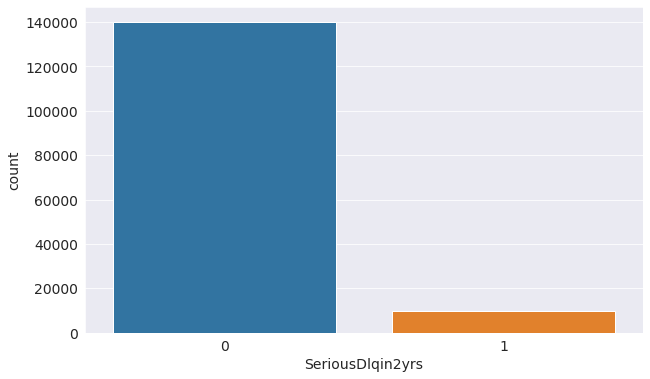

In [38]:
sns.countplot(data=df, x='SeriousDlqin2yrs');

### F1 Score

As is common with practical classification problems, the target data is highly imbalanced. An Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations. Sometimes when the records of a certain class are much more than the other class, our classifier may get biased towards the prediction.therefore we will not be using accuracy score as the evaluation metrics for our model.

The accuracy of a classifier is the total number of correct predictions by the classifier divided by the total number of predictions. This may be good enough for a well-balanced class but not ideal for the imbalanced class problem. The other metrics such as precision is the measure of how accurate the classifier’s prediction of a specific class and recall is the measure of the classifier’s ability to identify a class.

For an imbalanced class dataset F1 score is a more appropriate metric. It is the harmonic mean of precision and recall and the expression is –

![dds](https://i.imgur.com/jbjWu46.png)


So, if the classifier predicts the minority class but the prediction is erroneous and false-positive increases, the precision metric will be low and so as F1 score. Also, if the classifier identifies the minority class poorly, i.e. more of this class wrongfully predicted as the majority class then false negatives will increase, so recall and F1 score will low. F1 score only increases if both the number and quality of prediction improves.

F1 score keeps the balance between precision and recall and improves the score only if the classifier identifies more of a certain class correctly.

**Note**: For our project, we will be using the parameter, `average='micro'`, for our evaluation because the micro parameter ensures that each sample is weighed equally, therefore, it takes into account the distribution of the samples between the two classes (0, 1). In other words, it caters to the imbalanced data. As an example for our binary classification problem, say we get a F1-score of 0.7 for class 1 and 0.5 for class 2 and class 1 is made up 80% of our data, the formula would then be 0.7*80% + 0.5*(100%-80%) which would equal 0.66, since each sample is weighed equally and as a result the score is representative of the data imbalance. If class 1 is made up 50% of our data, the formula would shift to 0.7*50% + 0.5*(100%-50%) which would be 0.6.

## Model Building

We are going to train the model using 5 different algorithms to see which one gives the most reasonable f1 score. 

* Logistic Regression
* Decision Trees Classifier
* Random Forests Classifier
* XgBoost
* Lightgbm

### Logistic Regression

Logistic regression is a commonly used technique for solving binary classification problems.  In a logistic regression model:

* we take linear combination (or weighted sum of the input features)
* we apply the sigmoid function to the result to obtain a number between 0 and 1
* this number represents the probability of the input being classified as "Yes"
* instead of RMSE, the cross entropy loss function is used to evaluate the results

To train a logistic regression model, we can use the LogisticRegression class from Scikit-learn.

In [39]:
# Instantiate and fit the model
lr = LogisticRegression()
lr.fit(X_train, train_targets)

# Make predictions using the train & Val input columns
train_pred_lr = lr.predict(X_train)
val_pred_lr = lr.predict(X_val)

# Calculate the f1 micro score
train_score_lr = f1_score(train_targets, train_pred_lr, average='micro')
val_score_lr = f1_score(val_targets, val_pred_lr, average='micro')

print(f"Train f1 Score : {train_score_lr}")
print(f"Val f1 Score : {val_score_lr}\n")

Train f1 Score : 0.9331667985314119
Val f1 Score : 0.9338080379763715



### Decision Tree Classifier
A Decision Tree Classifier is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome. It is used to categorize or make predictions based on how a previous set of questions were answered. Decision trees imitate human thinking, so it’s generally easy for data scientists to understand and interpret the results.

We can use DecisionTreeClassifier from sklearn.tree to train a decision tree.

In [40]:
# Instantiate and fit the model
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, train_targets)

# Make predictions using the train & Val input columns
train_pred_dtc = dtc.predict(X_train)
val_pred_dtc = dtc.predict(X_val)

# Calculate the f1 micro score
train_score_dtc = f1_score(train_targets, train_pred_dtc, average='micro')
val_score_dtc = f1_score(val_targets, val_pred_dtc, average='micro')

print(f"Train f1 Score : {train_score_dtc}")
print(f"Val f1 Score : {val_score_dtc}\n")

Train f1 Score : 0.9996888584661612
Val f1 Score : 0.8972984505427101



### Random Forest Classifier
A Random Forest combines the results of several decision trees trained with slightly different parameters. The key idea here is that each decision tree in the forest will make different kinds of errors, and upon averaging, many of their errors will cancel out. This idea is also commonly known as the "wisdom of the crowd". A random forest works by averaging/combining the results of several decision trees

We'll use the RandomForestClassifier class from sklearn.ensemble

In [41]:
# Instantiate and fit the model
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)
rfc.fit(X_train, train_targets)

# Make predictions using the train & Val input columns
train_pred_rfc = rfc.predict(X_train)
val_pred_rfc = rfc.predict(X_val)

# Calculate the f1 micro score
train_score_rfc = f1_score(train_targets, train_pred_rfc, average='micro')
val_score_rfc = f1_score(val_targets, val_pred_rfc, average='micro')

print(f"Train f1 Score : {train_score_rfc}")
print(f"Val f1 Score : {val_score_rfc}\n")

Train f1 Score : 0.9989065597525091
Val f1 Score : 0.9358615355895138



### XgBoost
XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting. It is a scalable and highly accurate implementation of gradient boosting that pushes the limits of computing power for boosted tree algorithms, being built largely for energizing machine learning model performance and computational speed. With XGBoost, trees are built in parallel, instead of sequentially like GBDT. It follows a level-wise strategy, scanning across gradient values and using these partial sums to evaluate the quality of splits at every possible split in the training set. 

To train a GBM, we can use the XGBRegressor class from the XGBoost library.

In [42]:
# Instantiate and fit the model
xgb = XGBClassifier(n_jobs=-1, random_state=42)
xgb.fit(X_train, train_targets)

# Make predictions using the train & Val input columns
train_pred_xgb = xgb.predict(X_train)
val_pred_xgb = xgb.predict(X_val)

# Calculate the f1 micro score
train_score_xgb = f1_score(train_targets, train_pred_xgb, average='micro')
val_score_xgb = f1_score(val_targets, val_pred_xgb, average='micro')

print(f"Train f1 Score : {train_score_xgb}")
print(f"Val f1 Score : {val_score_xgb}\n")

Train f1 Score : 0.9489550089342069
Val f1 Score : 0.9357815291890018



### Lightgbm

LightGBM, short for light gradient-boosting machine, is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

* Faster training speed and higher efficiency.
* Lower memory usage.
* Better accuracy.
* Support of parallel, distributed, and GPU learning.
* Capable of handling large-scale data.

To train a LGBM, we can use the LGBMClassifier class from the lightgbm library.

In [43]:
# Instantiate and fit the model
lgb = LGBMClassifier(n_jobs=-1, random_state=42)
lgb.fit(X_train, train_targets)

# Make predictions using the train & Val input columns
train_pred_lgb = lgb.predict(X_train)
val_pred_lgb = lgb.predict(X_val)

# Calculate the f1 micro score
train_score_lgb = f1_score(train_targets, train_pred_lgb, average='micro')
val_score_lgb = f1_score(val_targets, val_pred_lgb, average='micro')

print(f"Train f1 Score : {train_score_lgb}")
print(f"Val f1 Score : {val_score_lgb}\n")

Train f1 Score : 0.9418165331721324
Val f1 Score : 0.9368216123956583



## Models Comparison

Let's compare the scores on our validation set to determine the best model 

In [44]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'XgBoost', 'Lightgbm'],
    'Score' : [val_score_lr, val_score_dtc, val_score_rfc, val_score_xgb, val_score_lgb]
}).sort_values(by = 'Score', ascending = False)

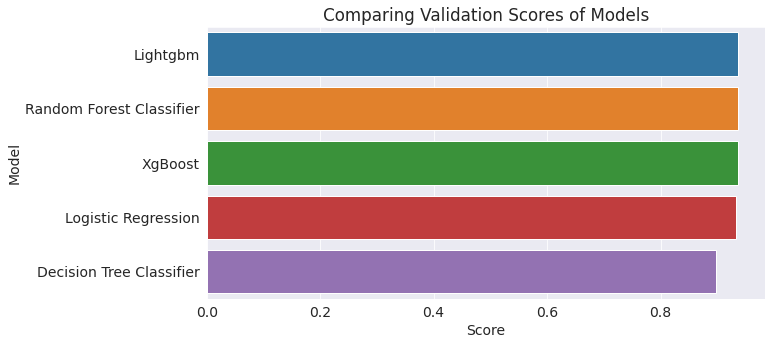

In [45]:
plt.figure(figsize=(10,5))
plt.title('Comparing Validation Scores of Models')
sns.barplot(data=models, x='Score', y='Model');

We can see that the Lightgbm Classifier is our best performing model. Lightgbm models assign an "importance" to each feature, by combining the importance values from individual trees. Let's check the most important feature.

In [46]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': lgb.feature_importances_
}).sort_values('importance', ascending=False)

In [47]:
plt.title('Lightgbm Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

Debt Ratio is the most important feature our model used for the prediction

## Hyperparameter Tuning on the Best Performing Model

Now that the best model has been determined to be the Lightgbm Classifier,  we will further tune the hyperparameters to get the best prediction value. Hyperparameters are parameters in a model that cannot be directly learned from the regular training process. They are usually fixed before the actual training process begins. These parameters express important properties of the model such as its complexity or how fast it should learn. 

**Overview of the most important hyperparameters**

Generally, hyperparameters of the most tree-based models can be grouped into 3 categories:
* Hyperparameters that affect the structure and learning of the decision trees
    * Example; num_leaves, max_depth and min_data_in_leaf
* Hyperparameters for better accuracy
    * Example; n_estimators, learning_rate and max_bin
* Hyperparameters to combat overfitting
    * Example; lambda_l1 and lambda_l2, min_gain_to_split, bagging_fraction, feature_fraction and bagging_freq

Check out the [documentation](https://colab.research.google.com/drive/10_bk3VE9D4bhX_7Gd8c4pVRxRQNzN_pt#scrollTo=v9XPU0j9v6w1&line=15&uniqifier=1) of LGBM for more details

To tune our model, we are going to consider every aspect of these important hyperparameters.

Firstly, we will define a helper function, `test_params`, to make it easy to test hyperparameters, and secondly, we will define a helper function, `test_param_and_plot`, to test and plot different values of a single parameter.

In [48]:
# First function

def test_params(**params):
    model = LGBMClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, train_targets)
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    return f1_score(train_targets, train_pred, average='micro'), f1_score(val_targets, val_pred, average ='micro')

In [49]:
# Second function

def test_param_and_plot(param_name, param_values):
    train_f1score, val_f1score = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_score, val_score = test_params(**params)
        train_f1score.append(train_score)
        val_f1score.append(val_score)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_f1score, 'b-o')
    plt.plot(param_values, val_f1score, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('F1 Score')
    plt.legend(['Training', 'Validation'])


### max_depth

In [50]:
test_param_and_plot('max_depth', [5, 10, 15, 20]) 

In [51]:
test_params(max_depth=10)

(0.9419765488181067, 0.9374083259994133)

### min_data_in_leaf

In [52]:
test_param_and_plot('min_data_in_leaf', [2, 5, 10, 15, 20]) 

[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


In [53]:
test_params(min_data_in_leaf=5)

[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5


(0.9418343126883517, 0.9371683067978772)

In [54]:
test_param_and_plot('learning_rate', [0.01, 0.02, 0.05, 0.1]) 

In [55]:
test_params(learning_rate=0.05)

(0.9395852038866023, 0.9374083259994133)

### Putting it together

Let's build a model with our best hyperparameters

In [56]:
final_model = LGBMClassifier(learning_rate = 0.05,
                            max_depth =10,
                            min_data_in_leaf=5,
                            num_leaves=15,
                            bagging_fraction = 0.5,
                            bagging_freq = 100,
                            feature_fraction = 0.6,
                            random_state=42,
                            n_jobs=-1)



In [57]:
final_model.fit(X_train,train_targets)

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_freq is set=100, subsample_freq=0 will be ignored. Current value: bagging_freq=100


LGBMClassifier(bagging_fraction=0.5, bagging_freq=100, feature_fraction=0.6,
               learning_rate=0.05, max_depth=10, min_data_in_leaf=5,
               num_leaves=15, random_state=42)

In [58]:
train_pred = final_model.predict(X_train)
val_pred = final_model.predict(X_val)

train_f1score = f1_score(train_targets, train_pred, average='micro')
val_f1score = f1_score(val_targets, val_pred, average ='micro')

print(f"Train f1 Score : {train_f1score}")
print(f"Val f1 Score : {val_f1score}")

Train f1 Score : 0.9383317479931371
Val f1 Score : 0.9381283836040216


We were only  able to increase the score on the validation set from 93.68% to 93.81% after tuning the hyperparameters of our model. This is a decent improvement but not something very substantial. We were not able to achieve higher f1 scores and this could be due to any of the following reasons:

* We may not have found the right mix of hyperparameters to regularize (reduce overfitting) the model properly, and we should keep trying to improve the model.

* We may have reached the limits of the modeling technique we're currently using (LGBM), and we should try tuning the hyperparameters of the other ensembling models.
*  may have reached the limits of what we can predict using the given amount of data, and we may need more data to improve the model.

*  may have reached the limits of how well we can predict using the given data, and we may need more features (columns) to further improve the model. In many cases, we can also generate new features using existing features (this is called feature engineering).

### Making a submission on Kaggle

Now that the model is trained, we can make predictions on the test set using our best model and make a submission to kaggle to see where we rank

In [59]:
test_pred = final_model.predict(X_test)
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
probability = final_model.predict_proba(X_test)

In [61]:
result=[]

for value in probability:
    result.append(value[1])

In [62]:
submission = pd.read_csv('GiveMeSomeCredit/sampleEntry.csv')

In [63]:
submission['Probability'] = result

In [65]:
submission.to_csv('submission.csv', index=False)

In [66]:
from IPython.display import FileLink
FileLink('submission.csv')

/content/submission.csv

![banner-image](https://i.imgur.com/zwb7LBc.png)

![bannerimage](https://i.imgur.com/yFkgs34.png)

We scored 166 out of 925 on the leaderboard putting us in the top 20% on the leaderboard.

## Making Predictions on New Inputs
Let's define a helper function to make predictions on new inputs.

In [67]:
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    X_input = input_df[numeric_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [68]:
sample_input = {'RevolvingUtilizationOfUnsecuredLines': 0.1466,
                'age': 30, 
                'NumberOfTime30-59DaysPastDueNotWorse': 1, 
                'DebtRatio': 689, 
                'MonthlyIncome': 30000,
                'NumberOfOpenCreditLinesAndLoans':6,
                'NumberOfTimes90DaysLate': 0,             
                'NumberRealEstateLoansOrLines':2,                 
                'NumberOfTime60-89DaysPastDueNotWorse':0,       
                'NumberOfDependents':2                  
               }

In [69]:
predict_input(final_model, sample_input)

(0, 0.9028378738082009)

## Saving Trained Models

We can save the parameters (weights and biases) of our trained model to disk, so that we needn't retrain the model from scratch each time we wish to use it.

We can use the joblib module to save Python objects on the disk.

In [70]:
import joblib

In [71]:
financial_model = {'model': final_model,
                  'scaler': scaler,
                  'input_cols': input_cols,
                  'target_col': target_col,
                  'numeric_cols': numeric_cols,
                 }

In [72]:
joblib.dump(financial_model, 'financial_model.joblib')

['financial_model.joblib']

## Summary
* The dataset contains 150,000 rows and 12 columns, while the test dataset contains about 100,000 rows with 12 columns.
* Our data set consists of only numerical columns. Monthly Income column has about 20% missing data, while Number of Dependents column has about 2%
* The missing values in Monthly Income column were replaced using the median of the distribution
* Missing values in Number of Dependents column were replaced using zero, which is the mode of the distribution
* The age column has minimum and maximum age as 0 and 109 respectively. The age a range was adjusted to 18 - 100 years to fit the acceptable minimum age to assess a loan and pensioners
* Most of the borrowers are within the 45-49 age range and younger people between the age range of 25-65 were found to be more likely to be past due on their financial obligation(s) than older people.
* The Monthly Income column has an exponential distribution with most of the borrowers within the income range of 0-99,000. Also, people with lower income tend to default more on loan repayment.
* There are over 7000 borrowers with debt ratio of more than 2449 times what they earn . This is about 5% of our entire dataset.
* All the people that fall under this 5% have missing values for monthly income, or have a monthly income of 0 and 1
* There are over 135,000 entries where a borrower has not been 90 days or more past due and has not experienced 90 days past due delinquency or worse
* We have about 3321 people with credit debt of over 100% and 172 people with credit debt of over 100000%
* F1 Score with the average parameter set to 'micro', was chosen as the evaluation metric for our models because our target column has imbalanced data, 93% No versus 6% Yes.
* The dataset was trained using 5 different models. LGBM Classifier gave the best score with 93.68% on the validation set.
* The LGBM Classifier found the Debt Ratio as the most useful feature in trying to predict the target
* We achieved an accuracy of 93.81% on the validation set after tuning 4 hyperparameters of the LGBM Classifier.
* Landed in the top 20% on the Kaggle leaderboard

## Future Work
* Use optimization procedures like Random search and Grid search to find a vector that results in the best performance of the model
* Use Frameworks like Optuna to automatically find the “sweet medium” between these parameters as tuning them manually can lead to mistakes especially since most of the time, these parameters have a lot of overlap, and increasing efficiency in one may risk a decrease in another.
* Try other ensembling models to see if we can achieve a significant jump in our score.
* Try other feature engineering techniques to see if that improves our model.


## References

* https://www.kaggle.com/competitions/GiveMeSomeCredit/overview
* https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/#:~:text=Imbalanced%20data%20refers%20to%20those,understand%20it%20with%20an%20example.
* https://www.kaggle.com/code/niteshyadav3103/hotel-booking-prediction-99-5-acc/notebook
* https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/decision-trees-and-random-forests
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
* https://www.thebalancemoney.com/does-income-affect-credit-315386
* https://www.kaggle.com/code/caesarlupum/modeling-give-me-some-credit
* https://www.kaggle.com/code/simonpfish/comp-stats-group-data-project-final
* https://lightgbm.readthedocs.io/en/latest/Parameters.html
* https://towardsdatascience.com/kagglers-guide-to-lightgbm-hyperparameter-tuning-with-optuna-in-2021-ed048d9838b5
* https://www.kaggle.com/code/kksienc/lightgbm-gridsearchcv-predictingcostsofusedcars